In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In this project, N is the number of time steps, M is the number of of path generated for the Brownian motion. For example, you could take N = 100 and M = 10, 000.

## (1) Brownian motion and Black Scholes model

#### (1.1) Brownian motion

(1.1.1) By using the rescaled random walk, build a program which give a path of a Brownian motion on [0, 1] with a time subdivision t_i = $\frac{i}{N}$ , 0 $\leq$ i $\leq$ N 

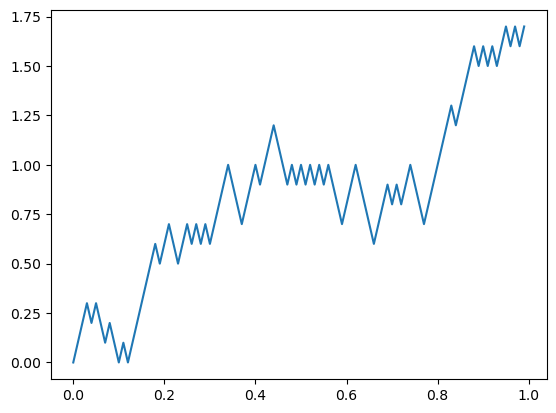

In [3]:
N = 100
np.random.seed(54321)

def walk(N):
    walks = np.random.rand(N)>0.5
    W = np.zeros(N+1)
    for i in range(len(walks)):
        # +1 if the value is > 0.5 else -1
        if walks[i]: W[i+1] = W[i] + 1
        else: W[i+1] = W[i] - 1
    # scale the term
    W = W/np.sqrt(N)
    x_axis = np.arange(0, 1, 1/N)
    np.append(x_axis, 1)
    return x_axis, W

x_axis, W = walk(N)
plt.plot(x_axis, W[:-1])

(1.1.2) Generate M path of a Brownian motion, prove numerically that E[$W_t$] = 0 and Var($W_t$) = t for different values of t.

In [4]:
N = 100
M = 10000
np.random.seed(54321)

walks = []
for i in range(M):
    # generate simple random walk
    _, cur_W = walk(N)
    walks.append(cur_W[:-1])

walks = np.array(walks)

In [5]:
# value of E[Wt] at random indices
np.mean(walks[:, [i for i in range(0, N, 13)]], axis=0)

# we can see that the mean at random indices are close to 0.

array([ 0.     , -0.00288, -0.00332,  0.00092,  0.00146, -0.0007 ,
        0.00318,  0.00126])

In [6]:
# absolute difference between var(Wt) and t at random indices

np.abs(np.var(walks[:, [i for i in range(10)]], axis=0) \
    - np.arange(0, 1, 1/N)[:10])

# again, we show that the variance at random indices i is very close to i itself.

array([0.000000e+00, 2.916000e-07, 3.501504e-04, 1.142500e-04,
       7.078400e-06, 5.602916e-04, 7.138496e-04, 1.759600e-04,
       1.057424e-04, 9.961584e-04])

(1.1.3) Compute numerically $[W, W]_t$ and observe that $[W, W]_t$ = t for some value of t.

In [7]:
ts = np.arange(0.1, 1.1, 0.2) # choose t as some random value between 0 and 1
qvs_mean, qvs_std = [], []
for t in ts:
    steps = int(t * N)
    # limit the walks range for each t and calculate the mean/variance
    qvs_mean.append(np.mean(np.sum(np.diff(walks[:, :steps+1])**2, axis=1)))
    qvs_std.append(round(np.std(np.sum(np.diff(walks[:, :steps+1])**2, axis=1)), 5))

qvs_mean, qvs_std, ts

# the result shows that the quadratic variation at time t will just be t, 
# and the variance of the quadratic variation is very close to 0.

([0.10000000000000003, 0.30000000000000004, 0.5, 0.7, 0.9000000000000004],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 array([0.1, 0.3, 0.5, 0.7, 0.9]))

#### (1.2) Stochastic integral

In this section we are studying

$$
    I = \int_0^1W_sdW_s
$$

We propose two schemes to approach numerically I on each path w $\in \Omega$:

$$
    I^-(w) = \sum_{i = 0}^NW_{t_{i+1}}(w)(W_{t{i+1}}(w) - W_{t_{i}}(w))
$$

or 

$$
    I_-(w) = \sum_{i = 0}^NW_{t_{i}}(w)(W_{t_{i+1}}(w) - W_{t_{i}}(w))
$$

(1.2.1) Observe numerically that $I^-=\frac{1}{2}W_1^2 + \frac{1}{2}$ almost surely

In [8]:
I_upper = np.mean(np.sum((np.diff(walks) * walks[:, 1:]), axis=1))
theoretical_val = 0.5 * np.mean(walks[:, -1]**2) + 0.5

I_upper, theoretical_val

(0.983876, 0.9888759999999999)

(1.2.2) Observe numerically that $I_-=\frac{1}{2}W_1^2 - \frac{1}{2}$ almost surely

In [9]:
I_lower = np.mean(np.sum((np.diff(walks) * walks[:, :-1]), axis=1))
theoretical_val = 0.5 * np.mean(walks[:, -1]**2) - 0.5

I_lower, theoretical_val

(-0.006123999999999932, -0.011124000000000078)

(1.2.3) Which definition of I do we keep in view of Ito’s formula applied to $W^2_1$?

- When applying Ito's formula to $W_1^2$, we aim to oderive the stoachastic integral of $W_tdW_t.$ The Ito's decomposition of $f(W_t)=W_t^2$ is $$df(W_t)=2W_tdW_t+dt.$$ Integrating both sides from 0 to 1 gives $$\int_0^12W_tdW_t+\int_0^1dt=W^2_1-W^2_0$$ Since $W_0=0,$ we have $$ \int_0^1W_tdW_t=\frac{1}{2}W^2_1-\frac{1}{2}$$ which corresponds to $I_-(w)=\sum_{i = 0}^NW_{t_{i}}(w)(W_{t_{i+1}}(w) - W_{t_{i}}(w))$ if we turn the integral into discrete summation. Hence $I_-$ is the choice we take.

(1.2.4) Compute numerically $E[I]$ and $E[I^2]$ for the choice of I made in question 3. and compare with the theoretical values.

In [10]:
# the theoretical expectation is 0 and variance is 1/2.
simulated_expectation = 0.5 * np.mean(walks[:, -1]**2) - 0.5
simulated_variance = 0.25 * np.std(walks[:, -1]**2)**2 + simulated_expectation**2

{"simulated expectation": simulated_expectation, "simulated variance": simulated_variance,
 "true expectation": 0, "true variance": 0.5}

{'simulated expectation': -0.011124000000000078,
 'simulated variance': 0.46426152,
 'true expectation': 0,
 'true variance': 0.5}

#### (1.3) Black-Scholes model

(1.3.1) Solution to SDE

The Black-Scholes price is solution to the following SDE under the risk neutral probability measure:
$$
dS_t = S_trdt + S_t\sigma dW_t, S_0 > 0, r \ge 0, \sigma > 0.
$$
We denote by S the solution to such equation. 
- By using the discretization of the time $t_i = \frac{i}{N}$ with $0 \leq i \leq N$, we introduce the following Euler-Maruyama numerical scheme: $$\tilde{S}_0=S_0 \\ \tilde{S}_{t_{i+1}} − \tilde{S}_{t_{i}} =  \tilde{S}_{t_{i}} r(t_{i+1} − t_i) + \tilde{S}_{t_{i}} \sigma (W_{t_{i+1}} − W_{t_i}) $$ Compare $\tilde{S}_{t_{i}}$ and $S_0e^{\sigma W_t+(r−\sigma^2/2)t}$ for some values of $t \in [0, 1]$.

In [11]:
# setup
S0 = 100
r = 0.05
sig = 0.1
N = 100
M = 10000
cur_walk = walks[99]

# generate S tilde
S_tilde = [S0]
for i in range(1, N):
    cur_S_tilde = S_tilde[i-1] + S_tilde[i-1] * r * (1/N) + S_tilde[i-1] * sig * (cur_walk[i] - cur_walk[i-1])
    S_tilde.append(cur_S_tilde)

test_idx = 50 # between 0 and 100
S_tilde[test_idx], S0 * np.exp(sig * cur_walk[test_idx] + (test_idx / N) * (r-sig**2)/2)

(104.34022793610154, 103.0454533953517)

- Compute numerically $E[S_1]$ by approaching the expectation with the Monte Carlo method, that is $E[S_1] \approx \frac{1}{M}\sum_{j=1}^MS^{(j)}_1$ where $S^{(j)}_1$ is the $jth$ simulation generated by you algorithm of $S_t$.

In [12]:
# Repeat previous part for M times
Ss = []
for j in range(M):
    S_tilde = [S0]
    cur_walk = walks[j]
    for i in range(1, N):
        cur_S_tilde = S_tilde[i-1] + S_tilde[i-1] * r * (1/N) + \
                      S_tilde[i-1] * sig * (cur_walk[i] - cur_walk[i-1])
        S_tilde.append(cur_S_tilde)
    
    Ss.append(S_tilde[-1])

monte_carlo_price = np.mean(Ss)
monte_carlo_price


105.0990753436162

(1.3.2) Black-Scholes price of European call and put option

- Create a function CallBS (resp. PutBS) with input $r, \sigma, S_0, T, K$ which returns the Black-Scholes price of a European call (resp. put) option.

In [13]:
def CallBS(S0:float=100, K:float=100, r:float=0.1, sigma:float=0.1, 
        T:float=1, call:bool=True) -> float:
    '''
    Implementation of black shore. Served as the true value of the option.
    @param s0: spot price for the stock
    @param k: strike price
    @param r: risk free rate
    @param sigma: volatility
    @param T: time span
    @param call: if a call or put option
    
    @return out: value of the option 
    '''
    d1 = (np.log(S0/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    
    if call:
        out = S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    else:
        out = K * np.exp(-r*T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return out

- Fix the initial price $S_0 = 40$ and $T = 1$. Observe that the price at time 0 of a call option is convex with respect to the strike.

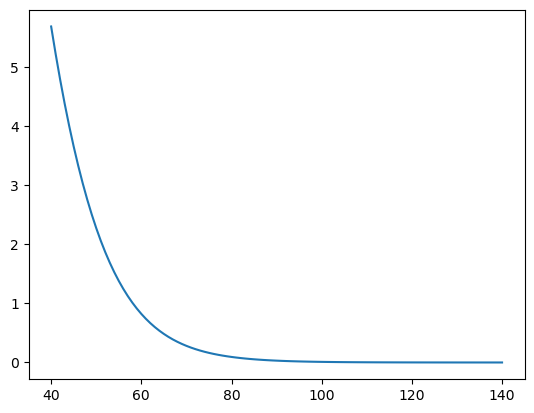

In [14]:
S0 = 40
r = 0.05
sigma = 0.3
T = 1
prices = []

for k in range(S0, 141):
    # iterate through value of K from 40 to 141
    init_price_cur = CallBS(S0=S0, K=k, r=r, sigma=sigma, T=T)
    prices.append(init_price_cur)

plt.plot(range(S0, 141), prices)

- Verify numerically the call-put parity for different values of the inputs.

In [15]:
S0 = 50
r = 0.1
sigma = 0.3
T = 1
K = 55

# we want to verify that put-call parity holds
callopt = CallBS(S0=S0, K=K, r=r, sigma=sigma, T=T, call=True)
putopt = CallBS(S0=S0, K=K, r=r, sigma=sigma, T=T, call=False)

LHS = callopt - putopt
RHS = S0 - K*math.e**(-r)

LHS, RHS

(0.23394200802222542, 0.23394200802222542)

#### (1.4) Approximation formula

We recall that the ATM call option is such that $K^{ATM} = e^{rT} S_0.$

(1.4.1) We recall that for $\sigma \sqrt{T}$ small enough, $CallBS(r, \sigma, S_0, T, K^{ATM}) \approx 0.4S_0\sigma \sqrt{T}.$ Check this property numerically by fixing $T=1$ and $\sigma$ varying in a small interval.

In [16]:
S0 = 50
r = 0.1
T = 1
K = np.exp(r*T)*S0
lhs = []
rhs = []

for sigma in range(1, 6):
    sigma = sigma/10
    lhs.append(CallBS(S0=S0, K=K, r=r, sigma=sigma, T=T, call=True))
    rhs.append(0.4 * S0 * sigma * np.sqrt(T))

np.array(lhs), np.array(rhs)

(array([1.99388058, 3.98278373, 5.96176924, 7.92597094, 9.87063257]),
 array([ 2.,  4.,  6.,  8., 10.]))

(1.4.2) The Delta of a call option at the money is given by 
$$
    \Delta_0 = N(d_+),
$$
with $$d_+ = \frac{\sigma}{2}\sqrt{T}.$$ We recall that for $\sigma\sqrt{T}$ small enough, $\Delta \approx 0.5 + 0.2\sigma\sqrt{T}.$ Check this property numerically by fixing $T = 1$ and $\sigma$ varying in a small interval.

In [17]:
S0 = 50
r = 0.1
T = 1
K = np.exp(r*T)*S0
lhs = []
rhs = []

for sigma in range(1, 6):
    sigma = sigma/10
    d1 = sigma * np.sqrt(T)/2
    delta_cur = norm.cdf(d1)
    lhs.append(delta_cur)
    rhs.append(0.5 + 0.2 * sigma * np.sqrt(T))

np.array(lhs), np.array(rhs)

(array([0.51993881, 0.53982784, 0.55961769, 0.57925971, 0.59870633]),
 array([0.52, 0.54, 0.56, 0.58, 0.6 ]))

(1.4.3) The Vega of a call option at time 0 at the money is given by $$V = S_0N'(d_+)\sqrt{T}.$$ We recall that for $\sigma\sqrt{T}$ small enough, $V \approx 0.4S_0\sqrt{T}.$ Check this property numerically by fixing T = 1 and σ varying in a small interval.

In [18]:
S0 = 50
r = 0.1
T = 1
K = np.exp(r*T)*S0
lhs = []
rhs = []

for sigma in range(1, 6):
    sigma = sigma/10
    d1 = sigma * np.sqrt(T)/2
    vega_cur = S0 * norm.pdf(d1) * np.sqrt(T)
    lhs.append(vega_cur)
    rhs.append(0.4 * S0 * np.sqrt(T))

np.array(lhs), np.array(rhs)

(array([19.9221957 , 19.84762737, 19.72396655, 19.5521347 , 19.33340584]),
 array([20., 20., 20., 20., 20.]))

## (2) Black-Scholes v.s. Bachelier

We assume that r = 0. In the Bachelier model, we suppose that the price of this asset is
$$
S_t^{(B)} = S_0 + \sigma^{(B)}W_t, \ S_0>0, \  \sigma^{(B)} > 0
$$
The Bachelier price of a call option is given by
$$
CallBach(0, \sigma^{(B)}, S_0, T, K) = E[(S_T^{(B)}-K)^+]=(S_0-K)N(\frac{S_0-K}{\sigma^{(B)}\sqrt{T}})+ \sigma^{(B)}\phi(\frac{S_0-K}{\sigma^{(B)}\sqrt{T}}),
$$
where $N$ is the c.d.f of the standard normal law and $\phi(x)=\frac{e^{-x^2}}{\sqrt{2\pi}}.$

#### (2.1.1) Create a function CallBach with input $\sigma^{(B)}, S_0, T, K$ which returns the Bachelier price of a European call option.

In [19]:
def CallBach(sig:float=0.3, s0:float=100, t:float=1, k:float=100):
    '''
    Implementation of bachelier model. Return the value of the option.
    @param sig: volatility
    @param s0: spot price for the stock
    @param t: time span
    @param k: strike price 
    
    @return out: value of the option 
    '''
    # compute d as per the Bachelier model
    d = (s0 - k) / (sig * np.sqrt(t))

    # calculate cdf and pdf of d
    N_d = norm.cdf(d)
    phi_d = norm.pdf(d)

    out = (s0 - k) * N_d + sig * np.sqrt(T) * phi_d

    return out

In [20]:
CallBach()

0.1196826841204298

#### (2.1.2) Verify numerically that at the money (that is S0 = K) we have $$0\leq Callbach(0, \sigma^{(B)}, S_0, T, S_0) - CallBS(0, \sigma^{(BS)}, S_0, T, S_0)\\ \leq \frac{S_0}{24\sqrt{2\pi}}|\sigma^{(BS)}|^3T^{3/2},$$ where $\sigma^{(B)}=S_0\sigma^{(BS)}$

In [21]:
sig_bs = 0.3
s0 = 100
sig_ba = s0 * sig_bs
t = 1

lhs = 0
mhs = CallBach(sig_ba, s0, t, s0) - CallBS(s0, s0, 0, sig_bs, t)
rhs = (s0/(24*np.sqrt(2*math.pi))) * (abs(sig_bs)**3) * t**(3/2)

lhs, mhs, rhs

(0, 0.04472993799448233, 0.044881006545161174)

## (3) Pricing Asian option in the Black-Scholes model

This part is based on 
- Kemna, A. G., & Vorst, A. C. (1990). A pricing method for options based on average
asset values. Journal of Banking & Finance, 14(1), 113-129.

The goal is to find the price of an Asian option, with payoff at time T is given by $(A_T-K)^+$ where $A_T=\frac{1}{T}\int_0^TS_tdt.$ This is an option on the mean of the asset S. 

This part follows Section 3: special characteristics of the AV-options and Section 4. Numerical Computations in the article of Nemna and Vorst. 

To do so, we use Monte-Carlo methods and we approach the integral as follow
$$
(Arithmetic mean) A_T \approx A_T^a := \frac{1}{n+1}\sum_{i=0}^nS_{t_i}, t_i = i\frac{T}{n}, \\
(Geometric mean) A_T \approx A_T^g := (\Pi_{i=0}^nS_{t_i})^{\frac{1}{n+1}}, t_i=i\frac{T}{n}.
$$
The price at time 0 of the Average-Value option is
$$
CallAsian(r, \sigma, S_0, T, K) = e^{-rT}E[(A_T-K)^+],
$$
depending on the approximation of A chosen.

#### (3.1) Compute the price of the Asian option CallAsian by approaching the expectation $E[(A_T − K)^+]$ with Monte Carlo method for different values of the parameters for both the arithmetical mean and the geometric mean

In [36]:
# arithmetic mean extimation
s0 = 49
k = 50

np.mean(np.maximum((np.sum(walks+s0, axis=1))/len(walks[0]) - k, 0))

0.00870180000000001

In [38]:
np.mean(walks+s0, axis=1)

array([49.838, 49.022, 48.97 , ..., 48.266, 49.71 , 48.706])

In [41]:
np.array(Ss).shape

(10000,)